### Dataset link
### https://www.kaggle.com/datasets/ramamet4/nse-stocks-database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
root = '../All_data_sets/practice/nifty_index'
paths = os.listdir(root)

In [4]:
paths

['banknifty.csv', 'nifty50.csv']

In [5]:
nifty_50 = pd.read_csv( os.path.join( root , paths[1] ) )
bank_nifty = pd.read_csv( os.path.join( root , paths[0] ) )

### Working with the nifty 50

In [6]:
nifty_50.head()

,index,date,time,open,high,low,close
0,NIFTY,20130401,09:16,5701.15,5704.65,5694.30,5697.00
1,NIFTY,20130401,09:17,5697.05,5698.35,5695.65,5697.50
2,NIFTY,20130401,09:18,5697.90,5697.90,5690.60,5692.15
3,NIFTY,20130401,09:19,5691.65,5694.70,5691.65,5693.90
4,NIFTY,20130401,09:20,5694.40,5695.05,5693.35,5694.55


In [7]:
nifty_50.shape

(352920, 7)

In [8]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352920 entries, 0 to 352919
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   352920 non-null  object 
 1   date    352920 non-null  int64  
 2   time    352920 non-null  object 
 3   open    352920 non-null  float64
 4   high    352920 non-null  float64
 5   low     352920 non-null  float64
 6   close   352920 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 18.8+ MB


In [9]:
nifty_50['date'].head()

0    20130401
1    20130401
2    20130401
3    20130401
4    20130401
Name: date, dtype: int64

In [10]:
nifty_50['date'] = pd.to_datetime(nifty_50['date'], format='%Y%m%d')

In [11]:
nifty_50['time'] = pd.to_datetime(nifty_50['time'], format='%H:%M').dt.time

In [12]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352920 entries, 0 to 352919
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   index   352920 non-null  object        
 1   date    352920 non-null  datetime64[ns]
 2   time    352920 non-null  object        
 3   open    352920 non-null  float64       
 4   high    352920 non-null  float64       
 5   low     352920 non-null  float64       
 6   close   352920 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.8+ MB


In [13]:
nifty_50.head()

,index,date,time,open,high,low,close
0,NIFTY,2013-04-01,09:16:00,5701.15,5704.65,5694.30,5697.00
1,NIFTY,2013-04-01,09:17:00,5697.05,5698.35,5695.65,5697.50
2,NIFTY,2013-04-01,09:18:00,5697.90,5697.90,5690.60,5692.15
3,NIFTY,2013-04-01,09:19:00,5691.65,5694.70,5691.65,5693.90
4,NIFTY,2013-04-01,09:20:00,5694.40,5695.05,5693.35,5694.55


In [14]:
nifty_50['date'].unique()

<DatetimeArray>
['2013-04-01 00:00:00', '2013-04-02 00:00:00', '2013-04-03 00:00:00',
 '2013-04-04 00:00:00', '2013-04-05 00:00:00', '2013-04-08 00:00:00',
 '2013-04-09 00:00:00', '2013-04-10 00:00:00', '2013-04-11 00:00:00',
 '2013-04-12 00:00:00',
 ...
 '2016-09-19 00:00:00', '2016-09-20 00:00:00', '2016-09-21 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-09-26 00:00:00',
 '2016-09-27 00:00:00', '2016-09-28 00:00:00', '2016-09-29 00:00:00',
 '2016-09-30 00:00:00']
Length: 925, dtype: datetime64[ns]

In [15]:
len(nifty_50['date'].unique())

925

### Converting the minute data into single day by date column

In [16]:
# Aggregate daily minute data 
daily_df = nifty_50.groupby(nifty_50['date'].dt.date).agg(
    open=('open', 'first'),
    close=('close', 'last'),
    low=('low', 'min'),
    high=('high', 'max')
).reset_index()

# daily_df

In [17]:
daily_df.head()

,date,open,close,low,high
0,2013-01-01,5937.90,5951.05,5935.20,5963.90
1,2013-01-02,5984.75,5991.95,5982.00,6006.05
2,2013-01-03,6017.00,6005.00,5986.55,6017.00
3,2013-01-04,6006.05,6012.75,5981.55,6020.75
4,2013-01-07,6038.90,5977.90,5977.15,6039.25


In [18]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    925 non-null    object 
 1   open    925 non-null    float64
 2   close   925 non-null    float64
 3   low     925 non-null    float64
 4   high    925 non-null    float64
dtypes: float64(4), object(1)
memory usage: 36.3+ KB


In [19]:
daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y%m%d')

In [20]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    925 non-null    datetime64[ns]
 1   open    925 non-null    float64       
 2   close   925 non-null    float64       
 3   low     925 non-null    float64       
 4   high    925 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 36.3 KB


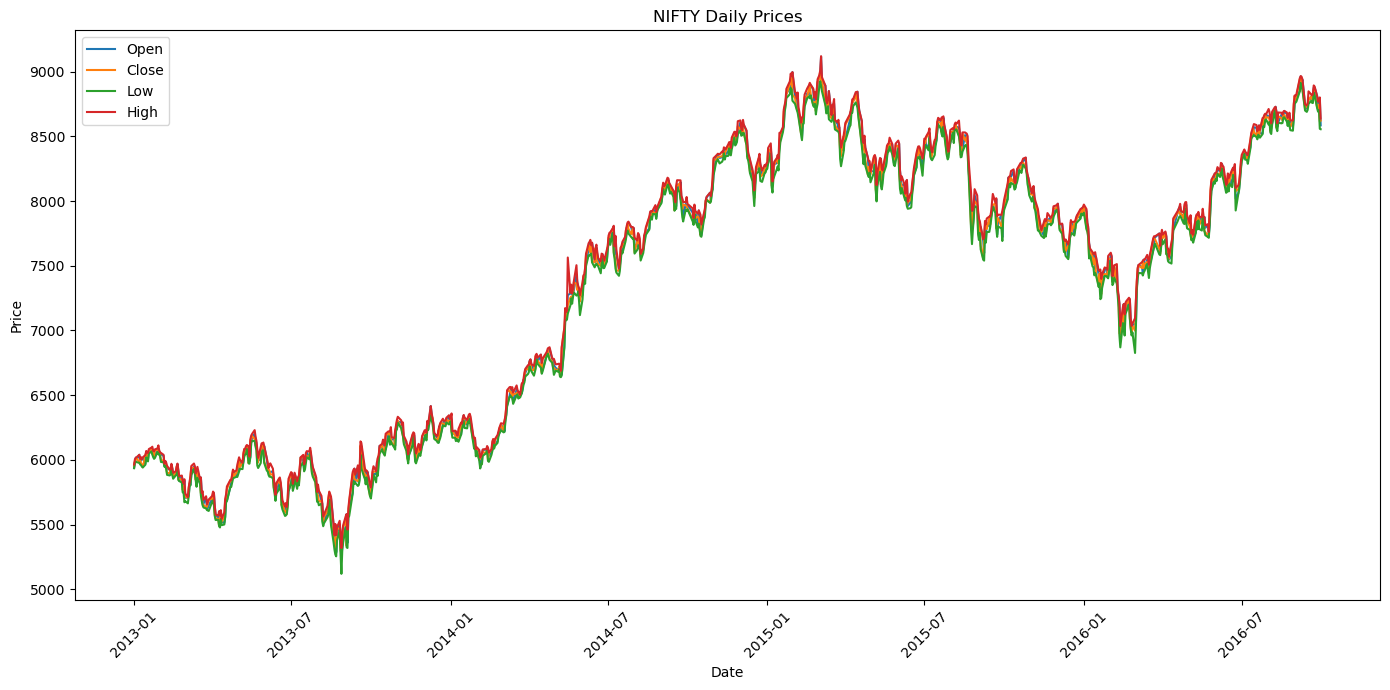

In [21]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_df, x='date', y='open', label='Open')
sns.lineplot(data=daily_df, x='date', y='close', label='Close')
sns.lineplot(data=daily_df, x='date', y='low', label='Low')
sns.lineplot(data=daily_df, x='date', y='high', label='High')

plt.title('NIFTY Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Working with banknifty

In [22]:
bank_nifty.head()

,index,date,time,open,high,low,close
0,BANKNIFTY,20121203,09:16,12125.70,12161.70,12125.70,12160.95
1,BANKNIFTY,20121203,09:17,12161.75,12164.80,12130.40,12130.40
2,BANKNIFTY,20121203,09:18,12126.85,12156.10,12126.85,12156.10
3,BANKNIFTY,20121203,09:19,12157.25,12164.75,12151.60,12164.20
4,BANKNIFTY,20121203,09:20,12162.80,12162.80,12148.20,12151.15


In [23]:
len(bank_nifty['date'].unique())

964

In [24]:
daily_df = bank_nifty.groupby(bank_nifty['date']).agg(
    open=('open', 'first'),
    close=('close', 'last'),
    low=('low', 'min'),
    high=('high', 'max')
).reset_index()

daily_df.shape

(964, 5)

In [25]:
daily_df.head()

,date,open,close,low,high
0,20121101,11276.55,11306.25,11230.20,11349.40
1,20121102,11442.85,11465.05,11394.15,11477.55
2,20121105,11442.20,11475.20,11401.30,11489.30
3,20121106,11439.45,11560.05,11429.05,11568.45
4,20121107,11548.50,11658.70,11519.60,11719.10


In [26]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    964 non-null    int64  
 1   open    964 non-null    float64
 2   close   964 non-null    float64
 3   low     964 non-null    float64
 4   high    964 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 37.8 KB


In [27]:
daily_df['date'] = pd.to_datetime( daily_df['date'] , format='%Y%m%d' )

In [28]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    964 non-null    datetime64[ns]
 1   open    964 non-null    float64       
 2   close   964 non-null    float64       
 3   low     964 non-null    float64       
 4   high    964 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 37.8 KB


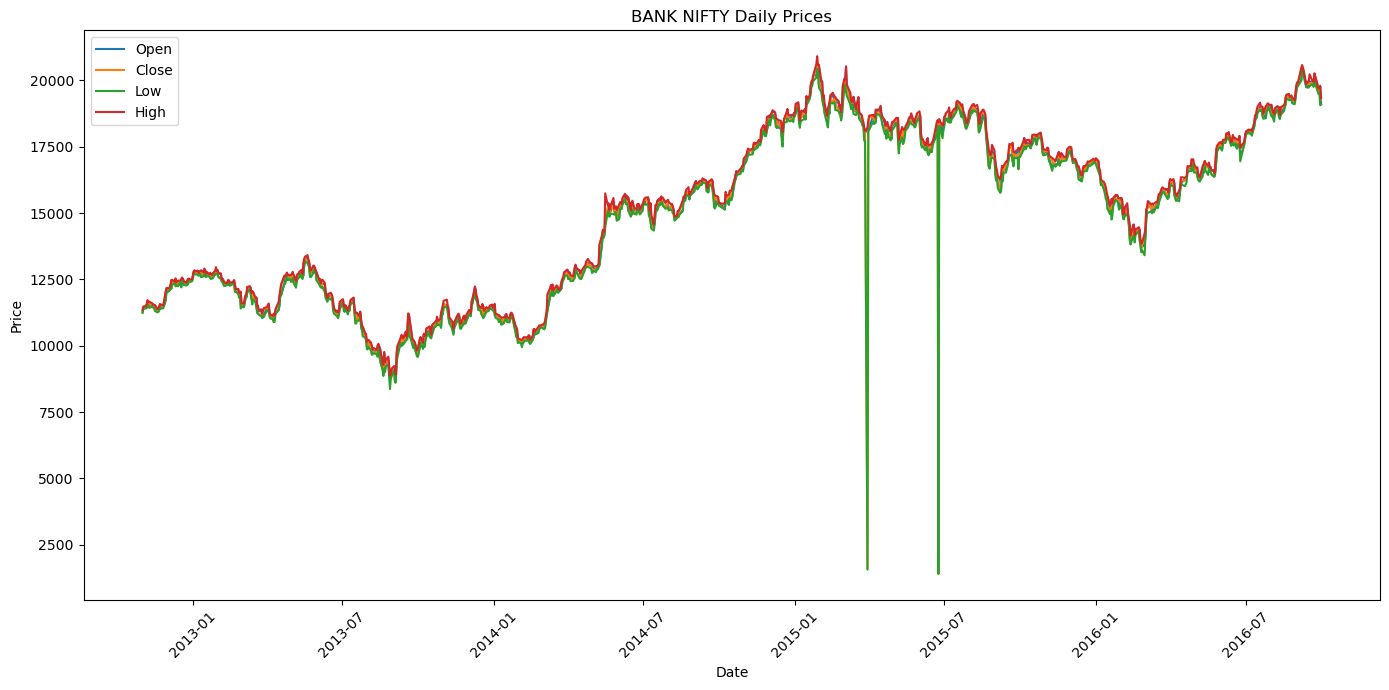

In [29]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_df, x='date', y='open', label='Open')
sns.lineplot(data=daily_df, x='date', y='close', label='Close')
sns.lineplot(data=daily_df, x='date', y='low', label='Low')
sns.lineplot(data=daily_df, x='date', y='high', label='High')

plt.title('BANK NIFTY Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()